## Rejection Sampling



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

We wish to compare several sampling methods. We will implement each of them individually as functions. 
For reproducibility, let's fix the seed of the (pseudo-)random number generator.

In [3]:
np.random.seed(42)

The rejection sampling consists in drawing a random sample of points according to a bounding function, which is essentially the best knowledge we have a priori of the distribution we wish to sample. In other words, the bounding function can be seen as a kind of prior in Bayesian inference.
If we don't  know a good bounding function, we start with the prior that reflects our ignorance the most: a uniform prior. We use this prior to draw points for all coordinates involved ($x$ and $y$ in our simple case). Note that it is often convenient to have a proposal bounding function ($g(x)$ hereafter) from which it is easy to sample. 

If 

In [11]:
def rejectionSampling(x, y, n):
    """
    Applies the rejection sampling method to a given function.
    Here y = f(x) is the probability distribution function to be sampled. 
    The number of sampling points is n, although many of them will be rejected.
    """
    # We define first a bounding function.
    # For simplicity, we define a rectangle bounded at xmin, xmax, and with height 
    # equal to the maximum of the function within the interval.
    xmin = np.amin(x)
    xmax = np.amax(x)
    ymin = np.amin(y)
    ymax = np.amax(y)

    # create empty lists to collected sampled data
    xsample, ysample = [], []
    xrej, yrej = [], []

    xtest = np.random.uniform(xmin, xmax, n)
    ytest = np.random.uniform(ymin, ymax, n)
    for i in range(n):
        if ytest[i] < np.interp(xtest[i], x, y):
            xsample.append(xtest[i])
            ysample.append(ytest[i])
        else:
            xrej.append(xtest[i])
            yrej.append(ytest[i])

    # Convert lists to numpy arrays.
    xsample = np.array(xsample)
    ysample = np.array(ysample)
    
    return xsample, ysample, xrej, yrej

Now let's try out this sampling method using a simple gaussian function. We know exactly what to expect:
$$ f(x) = \dfrac{1}{\sqrt{2\pi}} \exp\left( -\dfrac{x^2}{2} \right).$$
Below we define this (expected) function, and the we take $n$ samples from this distribution.

In [13]:
n = 5000
x = np.linspace(-3, 3, 10000)
y = np.exp(-x ** 2 / 2) / np.sqrt(2 * np.pi)
xs, ys, xr, yr = rejectionSampling(x, y, n)

Now we will plot the sampled points (xs, ys) and the analytic function.

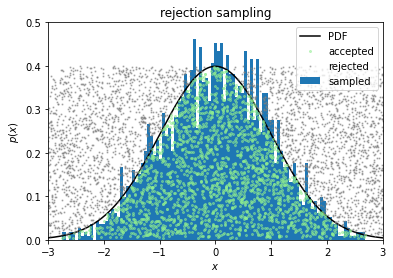

In [16]:
# Plotting the histogram with the data.
plt.plot(x, y, color = 'black', linestyle = 'solid', label = 'PDF') # original PDF
plt.plot(xs, ys, color = 'lightgreen', marker = 'o', markerSize = 2, linewidth = 0, label = 'accepted', alpha = 0.5) 
plt.plot(xr, yr, color = 'grey', marker = 's', markerSize = 1, linewidth = 0, label = 'rejected', alpha = 0.5) 
plt.hist(xs, bins = 100, density = True, label = 'sampled') 
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.title('rejection sampling')
plt.axis([-3, 3, 0, .5])
plt.legend()